In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

# Punto 4


In [2]:
#Obtenemos la aceleración
def GetA(x):

    return -x
    
#Condiciones iniciales
r0 = np.array([1,0])

#Array temporal 
N = 200
t = np.linspace(0.,10.,N)

In [3]:
#Método de Leap Frog (Simpléctico de orden 2)
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    return X,V

In [49]:
#Método simpléctico de orden 4, Yoshida
def GetYoshida(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    x = np.zeros(N)
    v = np.zeros(N) 
    
    w0 = - (2**(1/3))/(2- (2**(1/3)))
    w1 = (1 /(2 - (2**(1/3))))
    
    c1 = w1/2
    c4 = c1 
    c3 = (w0+w1)/2
    c2 = c3
    
    d1 = w1
    d2 = w0
    d3 = w1
    d4 = 0
    
    #Ponemos el primer punto
    x[0] = r0[0] 
    v[0] = r0[1] 
    
    
    for i in range(1,N):
        
        x1 = x[i-1] + c1*v[i-1]*h
        v1 = v[i-1] + d1*h*GetA(x1)

        x2 = x1 + c2*v1*h
        v2 = v1 + d2*h*GetA(x2)

        x3 = x2 + c3*v2*h
        v3 = v2 + d3*h*GetA(x3)

        x4 = x3 + c4*v3*h
        v4 = v3 + d4*h*GetA(x4)

        x[i] = x4
        v[i] = v4
    
    return x,v

In [50]:
#Solución usando Leap Frog 
xl, vl = GetLeapFrog(r0,t)

#Solución usando Yoshida
xy, vy = GetYoshida(r0,t)

#Energía usando Leap Frog
El = ((1/2)*(1)*(xl**2)) + ((1/2)*(1)*(vl**2))

#Energía usando Yoshida
Ey = ((1/2)*(1)*(xy**2)) + ((1/2)*(1)*(vy**2))


<IPython.core.display.Javascript object>


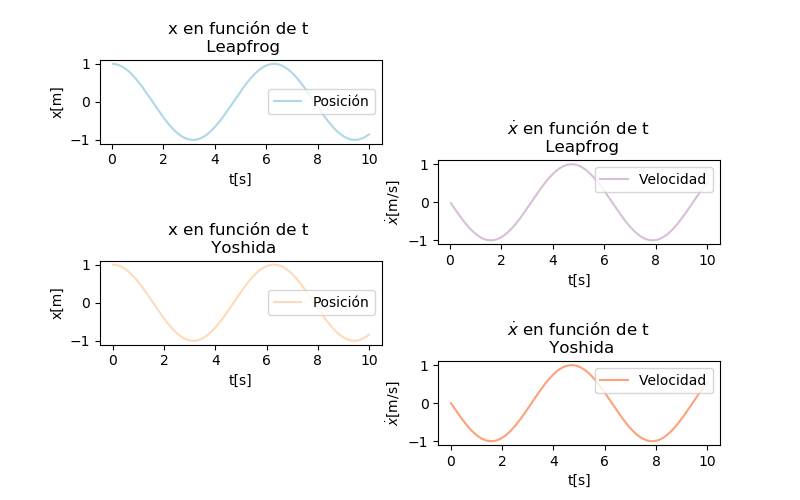

In [51]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(421)
ax1 = fig.add_subplot(424)
ax2 = fig.add_subplot(425)
ax3 = fig.add_subplot(428)

ax.plot(t[1:],xl, color = "lightblue",label='Posición')
ax.set_title("x en función de t \n Leapfrog")
ax.set_xlabel("t[s]")
ax.set_ylabel("x[m]")
ax.legend()

ax1.plot(t[1:],vl, color = "thistle",label='Velocidad')
ax1.set_title("$\dot{x}$ en función de t \n Leapfrog")
ax1.set_xlabel("t[s]")
ax1.set_ylabel("$\dot{x}$[m/s]")
ax1.legend()

ax2.plot(t,xy, color = "peachpuff",label='Posición')
ax2.set_title("x en función de t \n Yoshida")
ax2.set_xlabel("t[s]")
ax2.set_ylabel("x[m]")
ax2.legend()

ax3.plot(t,vy, color = "lightsalmon",label='Velocidad')
ax3.set_title("$\dot{x}$ en función de t \n Yoshida")
ax3.set_xlabel("t[s]")
ax3.set_ylabel("$\dot{x}$[m/s]")
ax3.legend()

<IPython.core.display.Javascript object>


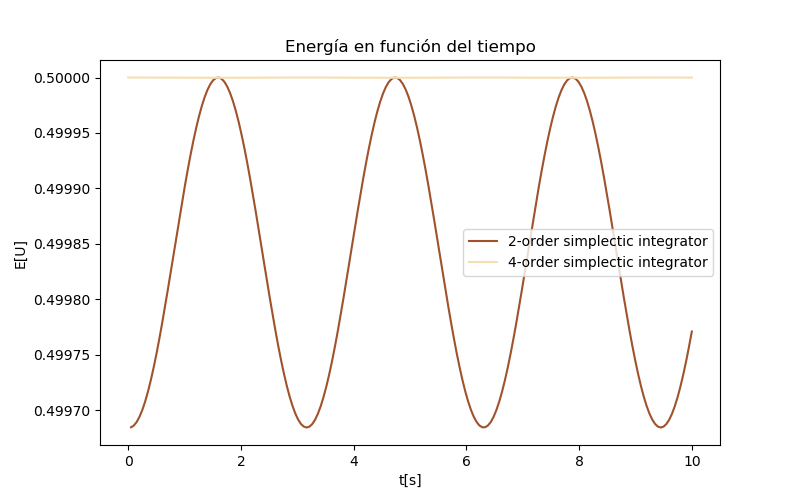

In [64]:
fig1 = plt.figure(figsize=(8,5))
ax4 = fig1.add_subplot(111)

ax4.plot(t[1:],El, color = "sienna",label='2-order simplectic integrator')
ax4.plot(t,Ey, color = "wheat",label='4-order simplectic integrator')
ax4.set_xlabel("t[s]")
ax4.set_ylabel("E[U]")
ax4.set_title("Energía en función del tiempo")
ax4.legend()

<IPython.core.display.Javascript object>


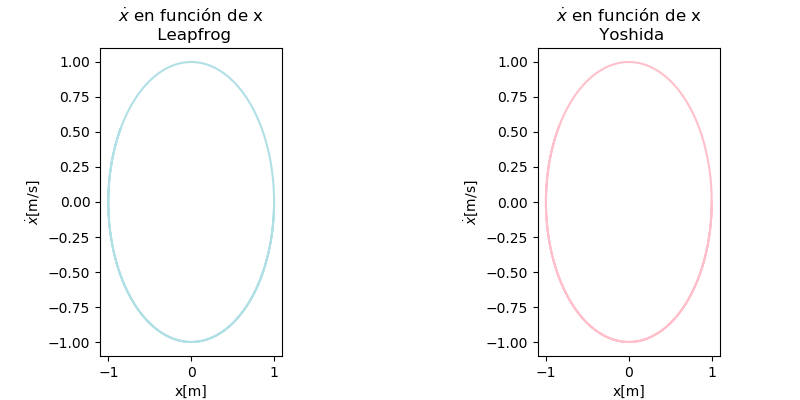

Text(0, 0.5, '$\\dot{x}$[m/s]')

In [78]:
fig2 = plt.figure(figsize=(8,4))
ax5 = fig2.add_subplot(131)
ax6 = fig2.add_subplot(133)

ax5.plot(xl, vl, color = "powderblue", label = "Leapfrog")
ax5.set_title("$\dot{x}$ en función de x \n Leapfrog")
ax5.set_xlabel("x[m]")
ax5.set_ylabel("$\dot{x}$[m/s]")

ax6.plot(xy,vy, color = "pink", label = "Yoshida")
ax6.set_title("$\dot{x}$ en función de x \n Yoshida")
ax6.set_xlabel("x[m]")
ax6.set_ylabel("$\dot{x}$[m/s]")